## Options

In [19]:
# Autoreload

%matplotlib inline

# Jupyter / Pandas Options

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1
<img src="./slides/slide_1.svg" alt="Drawing" style="width: 95%;"/>

## 2
<img src="./slides/slide_2.svg" alt="Drawing" style="width: 95%;"/>

## 3
<img src="./slides/slide_3.svg" alt="Drawing" style="width: 95%;"/>

## 4
<img src="./slides/slide_4.svg" alt="Drawing" style="width: 95%;"/>

## 5
<img src="./slides/slide_5.svg" alt="Drawing" style="width: 95%;"/>

## 6
<img src="./slides/slide_6.svg" alt="Drawing" style="width: 95%;"/>

## 7
<img src="./slides/slide_7.svg" alt="Drawing" style="width: 95%;"/>

## 7 Making a Map

* For the first part of the tutorial, we're going to make some maps using [Geopandas](https://geopandas.org/) and [Geoplot](https://residentmario.github.io/geoplot/index.html).


* As the name suggests, **Geopandas** is an implementation of pandas specifically for GIS, geography and location and it shares a similar API and conventions.


* **Geoplot** is a geographic plotting library built on top of matplotlib and seaborn.


* So if you know how to use Pandas, Matplotlib and Seaborn you'll be familiar with Geopandas and Geoplot.


* As part of the tutorial we'll be making two datasets:
    * `gdf_rs` containing our data
    * `gdf_map` which is our map

## 8 Making a Map: Importing our data

In [2]:
import pandas as pd

# Import as a pandas DataFrame
df_rs = pd.read_csv(
    'gs://dsf-geo-presentation/datasets/dft_road_safety_incidents.csv',
    low_memory=False
)

# Show the DataFrame
df_rs.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.000,182270.000,-0.140,51.525,1,3,2,2,01/01/2018,2,01:30,2,E09000007,3,501,3,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.000,184290.000,0.046,51.540,1,3,1,1,01/01/2018,2,00:50,17,E09000025,4,165,6,30,2,4,6,0,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.000,182910.000,-0.102,51.530,1,3,2,1,01/01/2018,2,00:45,3,E09000019,3,1,6,20,6,4,5,0,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.000,183220.000,0.038,51.530,1,2,2,1,01/01/2018,2,03:00,17,E09000025,4,167,3,30,7,2,3,124,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.000,176500.000,0.066,51.469,1,2,2,2,01/01/2018,2,02:20,6,E09000011,3,207,6,30,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01001682


**Speaker Notes**

* Note that the code and notes are on github - I'll share them at the end of the session


* We'll start by importing some data as a familiar pandas DataFrame. We're using 2018 road safety data from the Department for Transport


* This is downloadable from data.gov.uk but I've saved it into a Google Cloud Platform bucket so that others can run the notebook.


* You'll notice columns for **Easting** and **Northing**. These are a type of **CRS** called the [Ordanance Survey National Grid](https://en.wikipedia.org/wiki/Ordnance_Survey_National_Grid), but also commonly referred to as the British National Grid. 


* This is quite common for UK government datasets, but far less common for datasets sourced from elsewhere.


* You'll also see Longitude and Latitude, probably the most popular CRS that you'll probably have heard of.


* There's a column for **LSOA_of_Accident_Location**. **LSOA** stands for **Lower Super Output Area**. This is a code that represents a geographical area.


*  **LSOA** is part of a UK geographical hierarchy designed by ONS to improve the quality of geographic statistics. There's a full explanation of the hierarchy on the [ONS Website](https://www.ons.gov.uk/methodology/geography/ukgeographies/censusgeography).


* You might also see the abbreviation **NUTS**. Nuts stands for **Nomenclature of Territorial Units for Statistics** and is a hierarchy designed by the EU to improve the quality of EU statistics and make comparisons between countries easier. There is a full explanation on the [Eurostat website](https://ec.europa.eu/eurostat/web/nuts/background).

## 9 Making a Map: Making a GeoDataframe

In [3]:
import geopandas as gpd

# Make the geo DataFrame
gdf_rs = gpd.GeoDataFrame(
    df_rs, 
    geometry=gpd.points_from_xy(
        x=df_rs['Longitude'],
        y=df_rs['Latitude']
    )
)

In [4]:
# Show the DataFrame
gdf_rs.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,geometry
0,2018010080971,529150.000,182270.000,-0.140,51.525,1,3,2,2,01/01/2018,2,01:30,2,E09000007,3,501,3,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01000854,POINT (-0.13974 51.52459)
1,2018010080973,542020.000,184290.000,0.046,51.540,1,3,1,1,01/01/2018,2,00:50,17,E09000025,4,165,6,30,2,4,6,0,0,0,4,1,1,0,0,1,1,E01003531,POINT (0.04647 51.53965)
2,2018010080974,531720.000,182910.000,-0.102,51.530,1,3,2,1,01/01/2018,2,00:45,3,E09000019,3,1,6,20,6,4,5,0,0,5,4,1,1,0,0,1,1,E01002723,POINT (-0.10247 51.52975)
3,2018010080981,541450.000,183220.000,0.038,51.530,1,2,2,1,01/01/2018,2,03:00,17,E09000025,4,167,3,30,7,2,3,124,0,5,4,2,2,0,0,1,1,E01003492,POINT (0.03783 51.53018)
4,2018010080982,543580.000,176500.000,0.066,51.469,1,2,2,2,01/01/2018,2,02:20,6,E09000011,3,207,6,30,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01001682,POINT (0.06578 51.46926)


In [5]:
# Print the type of the geometry column
print(type(gdf_rs['geometry'][0]))

<class 'shapely.geometry.point.Point'>


**Speaker Notes**

* We can make a GeoDataframe in Geopandas. 


* In order to make a GeoDataframe we need to supply some form of geography to the `geometry` argument.


* In this case we'll use `Longitude` and `Latitude` and pass it to the `points_from_xy` method on our DataFrame. Note that `Longitude` comes first.


* This creates the `geometry` column. This is a convention in GIS and Geopandas.


* In this case it has created a `POINT` object which (unsurprisingly) represents a point.


* The `POINT` object is a **Shapely** object, which is a package that deals with creating and manipulating geometry.


* The `geometry` column can also contain other types of Shapely object, notably `POLYGON` for an area and `MULTIPOLYGON` for a collection of areas.

## 10 Making a Map: Basic Visualisation in Geopandas

* As with Pandas, Geopandas has a `plot()` method that enables quick plots:

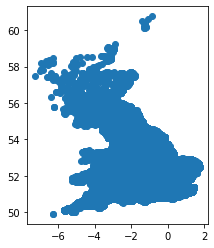

In [6]:
gdf_rs.plot();

**Speaker Notes**

* As we can see, it's plotted all the points and it's made a rough shape of the British Isles.


* In the scale we can see Lon / Lat values which gives us a clue about the projection (e.g. not OSGB / BNG).


* However, ideally, we want to put this on a map, which will mean combining it with a map GeoDataFrame.


* Need to make sure that the GeoDataFrames are talking the same language through setting the CRS.

## 11 Making a Map: Setting the CRS


* Note that there are two ways to set the CRS.
    * The old way: `gdf_rs.crs = {'init':'epsg:4326'}`
    * The new way: `gdf_rs.crs = {'epsg':'4326'}`
    
    
* Sometimes the new way doesn't work so always check it's correct!


* The two most common CRS:
    * OSGB / BNG: 27700
    * WGS84: 4326
 
    
* **OSGB / BNG** is unique to Britain and coordinates are measured in metres. It uses its own coordinate system.


* **WGS84** is a worldwide standard and coordinates are measured in degrees. It (like many other CRS) uses Lon / Lat.
    
    
* [EPSG.io](https://epsg.io/) Is a good resource for CRS.


* Interesting fact... EPSG stands for [European Petroleum Survey Group](https://support.esri.com/en/technical-article/000011199) who document and maintain a lot of the CRS.

In [7]:
# Set the CRS
gdf_rs.crs = {'init':'epsg:4326'}
gdf_rs.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Speaker Notes**

* Setting the CRS is really important. Without it Geopandas won't know how to convert your data.


* You have to play detective a bit for find the CRS. The only two 


* Note that there are two ways to set the CRS.
    * The old way: `gdf_rs.crs = {'init':'epsg:4326'}`
    * The new way: `gdf_rs.crs = {'epsg':'4326'}`
    
   

* Sometimes the new way doesn't work, so be sure to check and double check.


* A common mistake is not to set the CRS and then have to do conversions manually.

## 12 Making a Map: Transforming data with Mapshaper

* Map files usually come in one of two formats: **Shapefile** and **GeoJSON**


* There are lots of good maps available on the [ONS Geoportal](http://geoportal.statistics.gov.uk/), however they come with two challenges:
    1. The map files are large.
    2. The map files often has a CRS of OSGB / BNG, which means they need to be transformed before we can use them with Longitude and Latitude geometry data. Our dataset has OSGB cooridinates so we could just use those, but in the real world this is unlikely.


* We're going to use a [Local Authority District](https://geoportal.statistics.gov.uk/datasets/local-authority-districts-december-2019-boundaries-uk-bfc) map from the [ONS Geoportal](http://geoportal.statistics.gov.uk/)


* We can convert it to GEOJSON and reduce the size through simplifying the geometry with [♥️Mapshaper♥️](https://mapshaper.org/)

## 13 Making a Map: Creating the Map GeoDataFrame

In [8]:
# Create geodataframe
gdf_map = gpd.read_file(
    'https://storage.googleapis.com/dsf-geo-presentation/maps/UK_LA_Districts.json'
)

# Set the CRS
gdf_map.crs = {'init': 'epsg:27700'}

# Check the CRS
gdf_map.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [9]:
gdf_map.head()

,objectid,lad19cd,lad19nm,lad19nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,,447160,531474,-1.270,54.676,93712619.818,71011.934,"POLYGON ((448986.020 536729.680, 440052.701 52..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.211,54.545,53881564.271,44481.691,"POLYGON ((451747.397 520561.100, 448166.300 52..."
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.006,54.568,245069508.917,96703.990,"POLYGON ((478074.077 518800.567, 455910.572 52..."
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.307,54.557,204932953.781,123408.986,"POLYGON ((448476.677 525831.960, 440052.701 52..."
4,5,E06000005,Darlington,,428029,515648,-1.568,54.535,197475688.992,107206.402,"POLYGON ((436388.002 522354.197, 426981.097 52..."


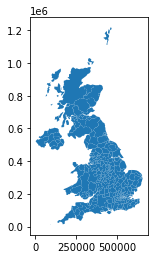

In [10]:
# Plot the map
gdf_map.plot();

**Speaker Notes**

* Here we're creating a second GeoDataFrame: `gdf_map`.


* We're using a Local Authority Map of the UK.


* We're setting the CRS to 27700 which is the code for OSGB / BNG.


* As always we check the CRS!


* The `geometry` column contains Shapely `POLYGON` and `MULTIPOLYGON` objects.


* Note the axis scale of the map


* The map also has Lon / Lat coordinates in it but we can't use these in our `geometry` column as they'll make a `POINT` and not a `POLYGON` or `MULTIPOLYGON`


* So we have to convert the CRS so that `gdf_map` DataFrame has the same CRS as the `gdf_rs` DataFrame.

## 14 Making a Map: Removing Polygons

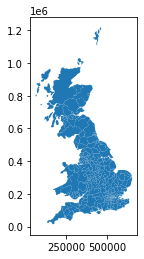

In [11]:
# Removing NI from the map
gdf_map = gdf_map[
    ~gdf_map['lad19cd'].str.startswith('N')
]


gdf_map.plot()

**Speaker Notes**

* Our Road Safety Incident data doesn't have NI in it, so we need to remove NI from the map.


* The `lad19cd` variable indicates which region a Local Authority is in.


* NI regions begin with 'N' so we can remove these records in the same way we would from a pandas DataFrame

## 15 Making a Map: Converting the CRS

In [12]:
# Convert the CRS of gdf_map
gdf_map = gdf_map.to_crs(epsg='4326')

# Check the CRS
gdf_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
# Check the GeoDataFrame
gdf_map.head()

,objectid,lad19cd,lad19nm,lad19nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,,447160,531474,-1.270,54.676,93712619.818,71011.934,"POLYGON ((-1.24099 54.72319, -1.38090 54.64392..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.211,54.545,53881564.271,44481.691,"POLYGON ((-1.20098 54.57763, -1.25618 54.58871..."
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.006,54.568,245069508.917,96703.990,"POLYGON ((-0.79425 54.55844, -1.13547 54.62960..."
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.307,54.557,204932953.781,123408.986,"POLYGON ((-1.25071 54.62532, -1.38090 54.64392..."
4,5,E06000005,Darlington,,428029,515648,-1.568,54.535,197475688.992,107206.402,"POLYGON ((-1.43836 54.59508, -1.58408 54.58161..."


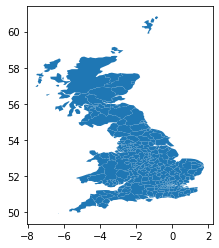

In [14]:
# Plot the map
gdf_map.plot();

**Speaker Notes**


* We can see that the crs and scale has changed from BNG coordinates to Lat / Lon


* Also the shape or the UK has changed. This is because WGS84 uses a different projection.


* Converting the CRS is easy if you know how. But if you don't it can cause a lot of pain.

## 16 Making a Map: Plotting a basic map

In [15]:
def plot_map_1():
    """Plot a map and data"""
    
    # Base Map
    base_map = gdf_map.plot(
        color='white',
        edgecolor='grey',
        linewidth=0.5,
        figsize=(15, 8),
        legend=True
    )
    base_map.axis('off')
    base_map.set_title('UK Road Traffic Incidents 2018')

    # Data
    gdf_rs.plot(ax=base_map);

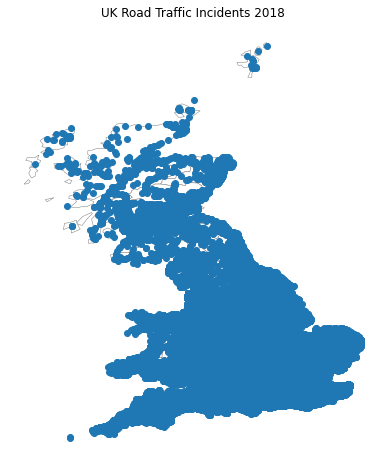

In [16]:
plot_map_1()

**Speaker Notes**

* Here we're plotting the map using the `plot()` method.


* We set the `base_map` object to our `gdf_map` and then apply options using `matplotlib` syntax.


* We then plot the points from our `gdf_rs` GeoDataFrame onto the map.


* However, we need to apply some styling and a different projection.

## 17 Making a Map: Plotting a Nicer Map

In [28]:
   """Plot a nicer map and data"""

def plot_map_2():
    # Base Map
    base_map = gdf_map.to_crs(epsg='3395').plot(
        color='white',
        edgecolor='grey',
        linewidth=0.5,
        figsize=(10, 10),
        legend=True
    )

    base_map.axis('off')
    base_map.set_title('UK Road Traffic Incidents 2018')

    # Data
    gdf_rs.to_crs(epsg='3395').plot(
        ax=base_map,
        markersize=0.2,
        color='red'
    );

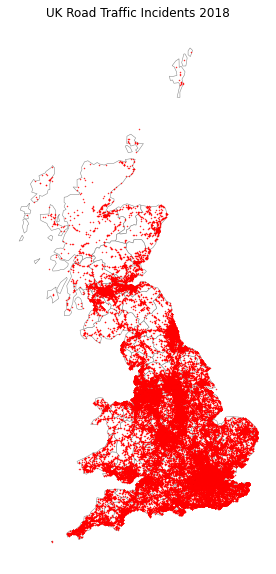

In [29]:
plot_map_2()

**Speaker Notes**

* This better looking map & projection!


* As before we used the `to_crs()` method to convert the CRS and set it to 3395 (Mercator).


* Lon / Lat supports many different projections including 4326 (WGS84) and 3395 (Mercator).


* For visualisation pick whichever represents your data best.


* If your map has a specific use case, you might need to do a little research for the best projection!


* Is this the best way to represent the data? Choropleth could be better!

## 18 Making a Choropleth: Prep the data

In [30]:
# Convert DataFrames to dictionaries for iteration
map_dict = gdf_map[['lad19nm', 'geometry']].to_dict(orient='records')
rs_dict = gdf_rs[['Accident_Index', 'geometry']].to_dict(orient='records')

# Empty list to assign output dictionaries to
rs_output_list = []

for incident in rs_dict:
    
    # Make a copy of the input indicent
    output_dict = incident.copy()
    
    # For each LA check whether the incident is located inside its polygon
    # If it does assign the LA name and append to the rs_output_list & break
    # the loop
    for la in map_dict:
        
        if incident['geometry'].within(la['geometry']):
            output_dict['lad19nm'] = la['lad19nm']
            rs_output_list.append(output_dict)
            break
        else:
            pass

**Speaker Notes**

* Our map is nice but it's difficult to interpret.


* A better map would be a choropleth which colours areas based upon a value.


* However we need to assign our points to an area to do this.


* So we're going to convert our DataFrames to json format and iterate through them to determine which Local Authority a point is in.


* We convert the two DataFrames to list of dictionaries (JSON)



* I **think** iterating through JSON is quicker than iterating through DataFrames.


* For each incident we iterate through the map and use the `within()` method to determine if a `POINT` is in a `POLYGON`


* You should do this with as higher quality map as possible! I haven't for simplicity!!


* If it is, we assign the name of the Local Authority (lad19nm) to the output dictionary.


* I also like parallelising via Dask - this is easier and quicker to write and process with dictionaries / lists.


* We then append the output dictionary to the rs_output_list and break the loop.

## 19 Making a Choropleth: Merge the data

In [31]:
gdf_ch = pd.merge(
    left=gdf_rs,
    right=pd.DataFrame(rs_output_list).drop('geometry', axis=1),
    on='Accident_Index',
    how='left'
)

gdf_ch['Incidents'] = 1
gdf_ch.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,geometry,lad19nm,Incidents
0,2018010080971,529150.000,182270.000,-0.140,51.525,1,3,2,2,01/01/2018,2,01:30,2,E09000007,3,501,3,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01000854,POINT (-0.13974 51.52459),Camden,1
1,2018010080973,542020.000,184290.000,0.046,51.540,1,3,1,1,01/01/2018,2,00:50,17,E09000025,4,165,6,30,2,4,6,0,0,0,4,1,1,0,0,1,1,E01003531,POINT (0.04647 51.53965),Newham,1
2,2018010080974,531720.000,182910.000,-0.102,51.530,1,3,2,1,01/01/2018,2,00:45,3,E09000019,3,1,6,20,6,4,5,0,0,5,4,1,1,0,0,1,1,E01002723,POINT (-0.10247 51.52975),Islington,1
3,2018010080981,541450.000,183220.000,0.038,51.530,1,2,2,1,01/01/2018,2,03:00,17,E09000025,4,167,3,30,7,2,3,124,0,5,4,2,2,0,0,1,1,E01003492,POINT (0.03783 51.53018),Newham,1
4,2018010080982,543580.000,176500.000,0.066,51.469,1,2,2,2,01/01/2018,2,02:20,6,E09000011,3,207,6,30,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01001682,POINT (0.06578 51.46926),Greenwich,1


**Speaker Notes**

* Now we need to put everything together in a single dataset: `gdf_ch`.


* The first step is to merge our newly created `lad19nm` column which tells us the LA in which the incident occured.


* Here we're merging our JSON object with the incident assigned to a Local Authority onto our gdf_rs DataFrame


* We're also creating the `Incidents` column for our upcoming Groupby

## 20 Making a Choropleth: Groupby

In [32]:
# Groupby
gdf_ch = (
    gdf_ch[['lad19nm', 'Incidents']]
    .groupby(['lad19nm'])
    .sum()
    .reset_index()
)

# Merge
gdf_ch = (
    pd.merge(
        left=gdf_map[['lad19nm', 'geometry']],
        right=gdf_ch,
        on='lad19nm',
        how='left'
    )
    .fillna(0)
)

In [33]:
gdf_ch.head()

,lad19nm,geometry,Incidents
0,Hartlepool,"POLYGON ((-1.24099 54.72319, -1.38090 54.64392...",71
1,Middlesbrough,"POLYGON ((-1.20098 54.57763, -1.25618 54.58871...",216
2,Redcar and Cleveland,"POLYGON ((-0.79425 54.55844, -1.13547 54.62960...",116
3,Stockton-on-Tees,"POLYGON ((-1.25071 54.62532, -1.38090 54.64392...",188
4,Darlington,"POLYGON ((-1.43836 54.59508, -1.58408 54.58161...",191


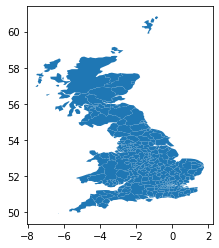

In [34]:
gdf_ch.plot()

**Speaker Notes**


* First of all we're grouping by the LA and summing the incidents.


* Then we merge on our map.


* Same syntax as pandas - nice!


* Geopandas won't plot our data automatically - we need to use **Geoplot** to make our Choropleth.

## 21 Making a Choropleth: Binning with Mapclassify

In [35]:
import mapclassify

scheme = mapclassify.Quantiles(gdf_ch['Incidents'], k=20)
scheme

Quantiles                 

     Interval        Count
--------------------------
[   1.00,   70.50] |    19
(  70.50,   98.00] |    20
(  98.00,  122.00] |    17
( 122.00,  138.00] |    20
( 138.00,  156.00] |    17
( 156.00,  181.00] |    20
( 181.00,  194.50] |    17
( 194.50,  207.00] |    19
( 207.00,  228.50] |    18
( 228.50,  247.00] |    19
( 247.00,  270.00] |    19
( 270.00,  284.00] |    18
( 284.00,  314.00] |    18
( 314.00,  347.00] |    19
( 347.00,  378.00] |    18
( 378.00,  423.00] |    19
( 423.00,  495.00] |    19
( 495.00,  662.00] |    19
( 662.00,  891.50] |    17
( 891.50, 2570.00] |    19

**Speaker Notes**

* Before we can make a Choropleth, we need to sort our data into categories/buckets/bins to apply a colour to.


* We can do this with [mapclassify](https://github.com/pysal/mapclassify)


* We're using `Quantiles` which splits the data into (more or less) equal categories/buckets/bins

## 22 Making a Choropleth: Plotting the Choropleth

In [36]:
import geoplot

def plot_choropleth():
    ax = geoplot.choropleth(
        gdf_ch,
        hue=gdf_ch['Incidents'], 
        cmap='coolwarm',
        scheme=scheme,
        legend=True,
        linewidth=0,
        figsize=(10,10)
    )

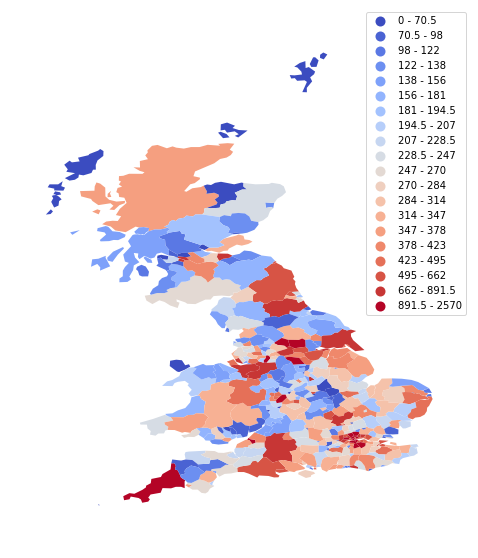

In [37]:
plot_choropleth()

**Speaker Notes**


* Geoplot has a similar syntax to Seaborn.


* Blue = low. Red = high.


* Lots of other cool plots you can do in Geoplot (Heatmaps, Plotting on different map sources etc. etc.)

## 23
<img src="./slides/slide_8.svg" alt="Drawing" style="width: 95%;"/>

**Speaker Notes**

* KeplerGL is an open source location visualisation Framework by Uber.


* It's very simple to use - most of the work occurs inside the Kepler interface.


* It can render either in your notebook or output to an html file for sharing.


* Do need to install a few bits and pieces first (Node and some Notebook widgets) but it's not too much hassle (on a mac)



## 24 KeplerGL: Preparing the Data

In [38]:
# Creating a Datetime column (Kepler is funny about datetimes)
gdf_rs['Time'] = gdf_rs['Time'].replace('nan', '0:00').fillna('0:00')
gdf_rs['DateTime'] = gdf_rs['Date'] + ' ' + gdf_rs['Time']
gdf_rs['DateTime'] = pd.to_datetime(gdf_rs['DateTime'], dayfirst=True, errors='coerce')
gdf_rs['DateTime'] = gdf_rs['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Creating an incident value
gdf_rs['Incident'] = 1

# Selecting only columns we need
gdf_rs = gdf_rs[[
    'Accident_Index', 'Accident_Severity', 'Number_of_Vehicles',
    'Number_of_Casualties', 'Longitude', 'Latitude', 'geometry',
    'DateTime'
]]

**Speaker Notes**

* Going to be using two datasets we've already created:
    * `df_rs`: Our source road incident data
    * `df_ch`: Our choropleth


* Kepler can use either GeoDataFrames or DataFrames and you don't need to worry about CRS etc.


* What you do need to worry about is filesize!


* Kepler is very intensive in terms of system resources, so only put in what data you need.


* We're also going to create a DateTime column to show the date and time of the collision.

## 24 KeplerGL: Creating the KeplerGL Map

In [39]:
from keplergl import KeplerGl

kepler_map = KeplerGl(
    height=700,
    data={
        'Incidents': gdf_rs,
        'Local Authorities': gdf_ch
    }    
)

kepler_map.save_to_html(file_name="Road_Safety.html")

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to Road_Safety.html!


## 25 Useful Links

General Resources:
* [What is GIS?](https://www.esri.com/en-us/what-is-gis/overview)
* [A Gentle Introduction to GIS](https://docs.qgis.org/3.4/en/docs/gentle_gis_introduction/index.html)
* [Coordinate Reference System (CRS) Finder](https://epsg.io/)
* [ONS Geography Hierarchies](https://www.ons.gov.uk/methodology/geography/ukgeographies/censusgeography)

Data Sources:
* [Data.gov.uk](https://data.gov.uk/)
* [ONS 2011 Census](https://www.ons.gov.uk/census/2011census)
* [Google Open Datasets (may require sign up to Google Cloud Platform)](https://console.cloud.google.com/marketplace/browse)
* [Data.world](https://data.world/)
* [Awesome Public Datasets (Github)](https://github.com/awesomedata/awesome-public-datasets)
* [Kaggle](https://www.kaggle.com/datasets)

Map Sources:
* [ONS Geoportal](http://geoportal.statistics.gov.uk/)
* [ESRI Data & Maps](https://www.arcgis.com/home/group.html?content=all&id=24838c2d95e14dd18c25e9bad55a7f82#overview)
* [DIVA GIS](http://www.diva-gis.org/gdata)

Supporting Data:
* [Source of data](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data)
* [Supporting GCS Bucket](https://console.cloud.google.com/storage/browser/dsf-geo-presentation/)

Reference:
* [GeoPandas API Reference](https://geopandas.org/)
* [Mapshaper](https://mapshaper.org/)
* [Geoplot](https://residentmario.github.io/geoplot/index.html)
* [Mapclassify](https://github.com/pysal/mapclassify)
* [KeplerGL](https://kepler.gl/)
* [KeplerGL Github (Includes Installation Instructions)](https://github.com/keplergl/kepler.gl/tree/master/bindings/kepler.gl-jupyter)
* [KeplerGL User Guide](https://docs.kepler.gl/docs/keplergl-jupyter)